# Results

In this file, I compare the results for different outbreaks. 

First, I import all the necessary libraries. 

In [1]:
import pandas as pd
import numpy as np
import glob
import re
import matplotlib.pyplot as plt

## Date

Now I read the data from the saved file for different outbreaks and clean them for analysis and save them in excel files for further investigation.

**I limit the analysis to the first two years of pandemics to be able to compare them properly.**

### Covid

In [2]:
Covid= pd.read_pickle('Covid.pkl')

Covid['Date Created']=pd.to_datetime(Covid['Date Created'], format='%Y%m%d', errors='ignore')

Covid=Covid.sort_values(by=['Date Created']).reset_index(drop=True)



for col in ['Abstract','Language','Institution','Grant','Countries']:
    Covid[col]=Covid[col].str.strip()
    
Covid=Covid.replace(r'^\s*$', np.NaN, regex=True)

Covid.loc[(Covid['Institution'].isnull() & Covid['Grant'].isnull()), 'Industry']=np.nan

Covid.to_csv("Covid (full).csv", index=False, date_format='%Y%m%d')

Start_date='2020-01-01'
End_data='2021-03-31'

Covid=Covid[Covid['Date Created']>=Start_date]
Covid=Covid[Covid['Date Created']<End_data].reset_index(drop=True)

Covid.to_csv("Covid.csv", index=False, date_format='%Y%m%d')

## Ebola

In [3]:
Ebola= pd.read_pickle('Ebola.pkl')

Ebola['Date Created']=pd.to_datetime(Ebola['Date Created'], format='%Y%m%d', errors='ignore')

Ebola=Ebola.sort_values(by=['Date Created']).reset_index(drop=True)

for col in ['Abstract','Language','Institution','Grant','Countries']:
    Ebola[col]=Ebola[col].str.strip()
    
Ebola=Ebola.replace(r'^\s*$', np.NaN, regex=True)

Ebola.loc[(Ebola['Institution'].isnull() & Ebola['Grant'].isnull()), 'Industry']=np.nan

Ebola.to_csv("Ebola (full).csv", index=False, date_format='%Y%m%d')

Start_date='2014-08-01'
End_data='2016-07-31'

Ebola=Ebola[Ebola['Date Created']>=Start_date]
Ebola=Ebola[Ebola['Date Created']<End_data].reset_index(drop=True)

Ebola.to_csv("Ebola.csv", index=False, date_format='%Y%m%d')

## H1N1

In [4]:
H1N1= pd.read_pickle('H1N1.pkl')

H1N1['Date Created']=pd.to_datetime(H1N1['Date Created'], format='%Y%m%d', errors='ignore')

H1N1=H1N1.sort_values(by=['Date Created']).reset_index(drop=True)



for col in ['Abstract','Language','Institution','Grant','Countries']:
    H1N1[col]=H1N1[col].str.strip()
    
H1N1=H1N1.replace(r'^\s*$', np.NaN, regex=True)

H1N1.loc[(H1N1['Institution'].isnull() & H1N1['Grant'].isnull()), 'Industry']=np.nan

H1N1.to_csv("H1N1 (full).csv", index=False, date_format='%Y%m%d')

Start_date='2009-04-01'
End_data='2011-04-30'

H1N1=H1N1[H1N1['Date Created']>=Start_date]
H1N1=H1N1[H1N1['Date Created']<End_data].reset_index(drop=True)

H1N1.to_csv("H1N1.csv", index=False, date_format='%Y%m%d')

## Zika

In [5]:
Zika= pd.read_pickle('Zika.pkl')

Zika['Date Created']=pd.to_datetime(Zika['Date Created'], format='%Y%m%d', errors='ignore')

Zika=Zika.sort_values(by=['Date Created']).reset_index(drop=True)



for col in ['Abstract','Language','Institution','Grant','Countries']:
    Zika[col]=Zika[col].str.strip()
    
Zika=Zika.replace(r'^\s*$', np.NaN, regex=True)

Zika.loc[(Zika['Institution'].isnull() & Zika['Grant'].isnull()), 'Industry']=np.nan

Zika.to_csv("Zika (full).csv", index=False, date_format='%Y%m%d')

Start_date='2016-02-01'
End_data='2018-01-31'

Zika=Zika[Zika['Date Created']>=Start_date]
Zika=Zika[Zika['Date Created']<End_data].reset_index(drop=True)

Zika.to_csv("Zika.csv", index=False, date_format='%Y%m%d')

### Number of publications

First, I show how the number of publications in change by time. To do that I create a dictionary of DataFrames, called 'df'. Then I write a loop to calculate the length of publication in each month. for each of pandemics. The variable 'freq' set the length of each time period. 

In [6]:
var='_Publication_Count'

df = {'Covid'+var:Covid, 'Ebola'+var:Ebola, 'H1N1'+var:H1N1, 'Zika'+var:Zika}

Pandemics=['Covid','Ebola', 'H1N1', 'Zika']

for pan in Pandemics:
    
    df[pan+var] = df[pan+var][['Publication ID','Date Created']].drop_duplicates().reset_index(drop=True)
    
    df[pan+var]=df[pan+var].groupby(pd.Grouper(key="Date Created",freq='M', closed='left', label='left'))

    df[pan+var]=df[pan+var].agg('count')

    df[pan+var]=df[pan+var].rename(columns={'Publication ID': 'Publication Count'})

    df[pan+var]['Months'] = range(len(df[pan+var]))

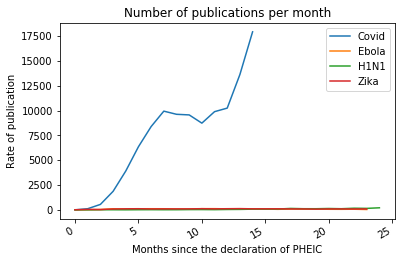

In [7]:
fig, ax = plt.subplots()

for pan in Pandemics:

    ax.plot(df[pan+var]['Months'], df[pan+var]['Publication Count'], label=pan)
    
plt.legend()

fig.autofmt_xdate()

plt.xlabel('Months since the declaration of PHEIC')

plt.ylabel('Rate of publication')

plt.title('Number of publications per month')

plt.show()

fig.savefig('Number_publications.png')

plt.close(fig)

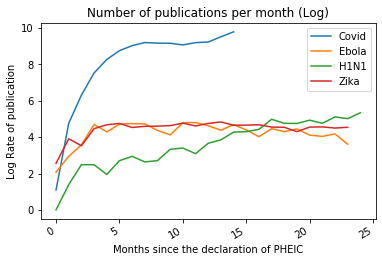

In [8]:
fig, ax = plt.subplots()

for pan in Pandemics:

    ax.plot(df[pan+var]['Months'], np.log(df[pan+var]['Publication Count']), label=pan)
    
plt.legend()

fig.autofmt_xdate()

plt.xlabel('Months since the declaration of PHEIC')

plt.ylabel('Log Rate of publication')

plt.title('Number of publications per month (Log)')

plt.show()

fig.savefig('Number_publications_log.png')

plt.close(fig)

### Language

Next, I look into how the share of English publications changes over time.

In [9]:
var='_Language'

df = {'Covid'+var:Covid, 'Ebola'+var:Ebola, 'H1N1'+var:H1N1, 'Zika'+var:Zika}

Pandemics=['Covid','Ebola', 'H1N1', 'Zika']

for pan in Pandemics:
    
    df[pan+var] = df[pan+var][['Publication ID','Language','Date Created']].drop_duplicates().dropna(subset=['Language']).reset_index(drop=True)
    
    df[pan+var]['English']= (df[pan+var]['Language']=='English')

    df[pan+var]=df[pan+var].groupby(pd.Grouper(key="Date Created",freq='M', closed='left', label='left'))

    df[pan+var]=df[pan+var][['English']].agg('mean')

    df[pan+var]['Months'] = range(len(df[pan+var]))

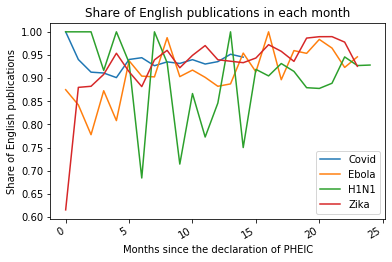

In [10]:
fig, ax = plt.subplots()

for pan in Pandemics:

    ax.plot(df[pan+var]['Months'], df[pan+var]['English'], label=pan)
    

plt.legend()

fig.autofmt_xdate()

plt.xlabel('Months since the declaration of PHEIC')

plt.ylabel('Share of English publications')

plt.title('Share of English publications in each month')

plt.show()

fig.savefig('Language.png')

plt.close(fig)

### Number of Countries

Now, I look at how the number of countries involved in publications changes by time.

In [11]:
var='_Number_Countries'

df = {'Covid'+var:Covid, 'Ebola'+var:Ebola, 'H1N1'+var:H1N1, 'Zika'+var:Zika}

Pandemics=['Covid','Ebola', 'H1N1', 'Zika']

for pan in Pandemics:
    
    df[pan+var] = df[pan+var][['Publication ID','Number of Countries','Date Created']].drop_duplicates().dropna(subset=['Number of Countries']).reset_index(drop=True)

    df[pan+var]=df[pan+var].groupby(pd.Grouper(key="Date Created",freq='M', closed='left', label='left'))

    df[pan+var]=df[pan+var][['Number of Countries']].agg('mean')

    df[pan+var]['Months'] = range(len(df[pan+var]))

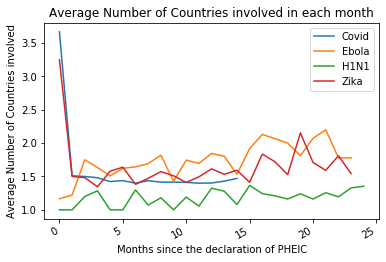

In [12]:
fig, ax = plt.subplots()

for pan in Pandemics:

    ax.plot(df[pan+var]['Months'], df[pan+var]['Number of Countries'], label=pan)
    

plt.legend()

fig.autofmt_xdate()

plt.xlabel('Months since the declaration of PHEIC')

plt.ylabel('Average Number of Countries involved')

plt.title('Average Number of Countries involved in each month')

plt.show()

fig.savefig('Number_Countries.png')

plt.close(fig)

### Animal Origin

Next, I show how the portion of publications with animal origin changes over time.

In [13]:
var='_Animal_Origin'

df = {'Covid'+var:Covid, 'Ebola'+var:Ebola, 'H1N1'+var:H1N1, 'Zika'+var:Zika}

Pandemics=['Covid','Ebola', 'H1N1', 'Zika']

for pan in Pandemics:
    
    df[pan+var] = df[pan+var][['Publication ID','Animal_Origin','Date Created']].drop_duplicates().dropna(subset=['Animal_Origin']).reset_index(drop=True)

    df[pan+var]=df[pan+var].groupby(pd.Grouper(key="Date Created",freq='M', closed='left', label='left'))

    df[pan+var]=df[pan+var][['Animal_Origin']].agg('mean')

    df[pan+var]['Months'] = range(len(df[pan+var]))

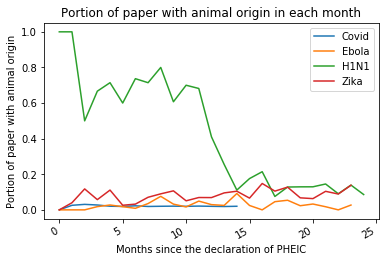

In [14]:
fig, ax = plt.subplots()

for pan in Pandemics:

    ax.plot(df[pan+var]['Months'], df[pan+var]['Animal_Origin'], label=pan)
    

plt.legend()

fig.autofmt_xdate()

plt.xlabel('Months since the declaration of PHEIC')

plt.ylabel('Portion of paper with animal origin')

plt.title('Portion of paper with animal origin in each month')

plt.show()

fig.savefig('Animal_Origin.png')

plt.close(fig)

***The reason for the high rate of animal origin for H1N1 in the earlier months is that the disease was referred to as swine influenza during that time and we search for the word 'swine' to indicate animal origin.***

### Vaccine

Here, I show how the portion of publications that mentioned 'Vaccine' in tile or abstract changes over time.

In [15]:
var='_Vaccine'

df = {'Covid'+var:Covid, 'Ebola'+var:Ebola, 'H1N1'+var:H1N1, 'Zika'+var:Zika}

Pandemics=['Covid','Ebola', 'H1N1', 'Zika']

for pan in Pandemics:
    
    df[pan+var] = df[pan+var][['Publication ID','Vaccine','Date Created','Abstract']].dropna(subset=['Abstract'])
    
    df[pan+var] = df[pan+var][['Publication ID','Vaccine','Date Created']].drop_duplicates().reset_index(drop=True)

    df[pan+var]=df[pan+var].groupby(pd.Grouper(key="Date Created",freq='M', closed='left', label='left'))

    df[pan+var]=df[pan+var][['Vaccine']].agg('mean')

    df[pan+var]['Months'] = range(len(df[pan+var]))

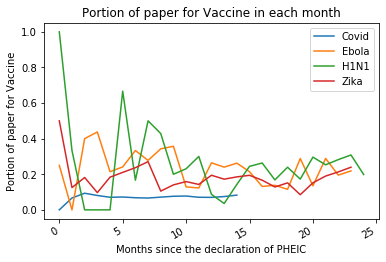

In [16]:
fig, ax = plt.subplots()

for pan in Pandemics:

    ax.plot(df[pan+var]['Months'], df[pan+var]['Vaccine'], label=pan)
    

plt.legend()

fig.autofmt_xdate()

plt.xlabel('Months since the declaration of PHEIC')

plt.ylabel('Portion of paper for Vaccine')

plt.title('Portion of paper for Vaccine in each month')

plt.show()

fig.savefig('Vaccine.png')

plt.close(fig)

### Diagnostic

Here, I show how the portion of publications that mentioned 'Diagnostic' in tile or abstract changes over time.

In [17]:
var='_Diagnostic'

df = {'Covid'+var:Covid, 'Ebola'+var:Ebola, 'H1N1'+var:H1N1, 'Zika'+var:Zika}

Pandemics=['Covid','Ebola', 'H1N1', 'Zika']

for pan in Pandemics:
    
    df[pan+var] = df[pan+var][['Publication ID','Diagnostic','Date Created','Abstract']].dropna(subset=['Abstract'])
    
    df[pan+var] = df[pan+var][['Publication ID','Diagnostic','Date Created']].drop_duplicates().reset_index(drop=True)

    df[pan+var]=df[pan+var].groupby(pd.Grouper(key="Date Created",freq='M', closed='left', label='left'))

    df[pan+var]=df[pan+var][['Diagnostic']].agg('mean')

    df[pan+var]['Months'] = range(len(df[pan+var]))

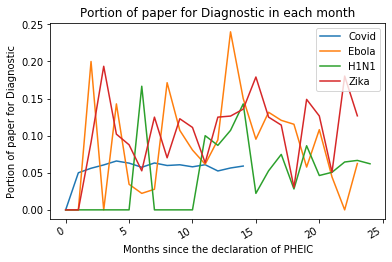

In [18]:
fig, ax = plt.subplots()

for pan in Pandemics:

    ax.plot(df[pan+var]['Months'], df[pan+var]['Diagnostic'], label=pan)
    

plt.legend()

fig.autofmt_xdate()

plt.xlabel('Months since the declaration of PHEIC')

plt.ylabel('Portion of paper for Diagnostic')

plt.title('Portion of paper for Diagnostic in each month')

plt.show()

fig.savefig('Diagnostic.png')

plt.close(fig)

### Industry Involvement

Next, I show how the portion of publications with industry involvement changes over time.

In [19]:
var='_Industry_Involvement'

df = {'Covid'+var:Covid, 'Ebola'+var:Ebola, 'H1N1'+var:H1N1, 'Zika'+var:Zika}

Pandemics=['Covid','Ebola', 'H1N1', 'Zika']

for pan in Pandemics:
    
    df[pan+var] = df[pan+var][['Publication ID','Industry','Date Created']].drop_duplicates().dropna(subset=['Industry']).reset_index(drop=True)

    df[pan+var]=df[pan+var].groupby(pd.Grouper(key="Date Created",freq='M', closed='left', label='left'))

    df[pan+var]=df[pan+var][['Industry']].agg('mean')

    df[pan+var]['Months'] = range(len(df[pan+var]))

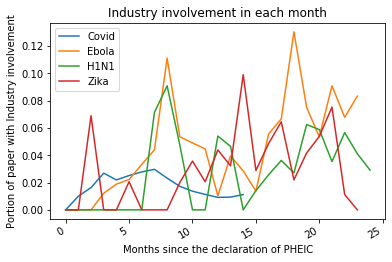

In [20]:
fig, ax = plt.subplots()

for pan in Pandemics:

    ax.plot(df[pan+var]['Months'], df[pan+var]['Industry'], label=pan)
    

plt.legend()

fig.autofmt_xdate()

plt.xlabel('Months since the declaration of PHEIC')

plt.ylabel('Portion of paper with Industry involvement')

plt.title('Industry involvement in each month')

plt.show()

fig.savefig('Industry_Involvement.png')

plt.close(fig)

### Length of publication

Now, I show how the length of publications changes over time. I show both the total number of pages and the average length of publication.

In [21]:
var='_Length_Publication'

df = {'Covid'+var:Covid, 'Ebola'+var:Ebola, 'H1N1'+var:H1N1, 'Zika'+var:Zika}

Pandemics=['Covid','Ebola', 'H1N1', 'Zika']

for pan in Pandemics:
    
    df[pan+var] = df[pan+var][['Publication ID','Length of publications','Date Created']].drop_duplicates().dropna(subset=['Length of publications']).reset_index(drop=True)

    df[pan+var]=df[pan+var].groupby(pd.Grouper(key="Date Created",freq='M', closed='left', label='left'))

    df[pan+var+'_mean']=df[pan+var][['Length of publications']].agg('mean')

    df[pan+var+'_mean']['Months'] = range(len(df[pan+var+'_mean']))
    
    df[pan+var+'_sum']=df[pan+var][['Length of publications']].agg('sum')

    df[pan+var+'_sum']['Months'] = range(len(df[pan+var+'_sum']))

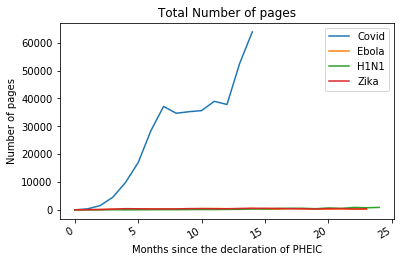

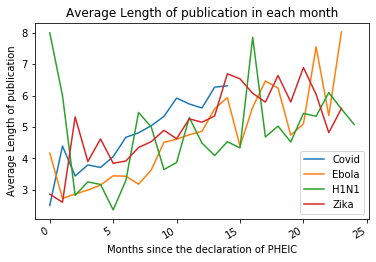

In [22]:
fig, ax = plt.subplots()

fig.autofmt_xdate()

plt.xlabel('Months since the declaration of PHEIC')

plt.title('Total Number of pages')

for pan in Pandemics:

    ax.plot(df[pan+var+'_sum']['Months'], df[pan+var+'_sum']['Length of publications'], label=pan)
    
plt.legend()

plt.ylabel('Number of pages')

plt.show()

fig.savefig('Length_Publication_sum.png')

plt.close(fig)



fig, ax = plt.subplots()

fig.autofmt_xdate()

plt.xlabel('Months since the declaration of PHEIC')

plt.title('Average Length of publication in each month')

for pan in Pandemics:

    ax.plot(df[pan+var+'_mean']['Months'], df[pan+var+'_mean']['Length of publications'], label=pan)
    
plt.legend()

plt.ylabel('Average Length of publication')

plt.show()

fig.savefig('Length_Publication_mean.png')

plt.close(fig)

### Income group

Next, I look into what portion of publications are written by authors from countries in different income groups. To do that first I calculate the portion of authors in each income group. We should notice that if a publication has authors from more than one country, each country will be counted separately. Since the number of publications from the United States is uniquely high, I separate it from other high-income countries and put it in its own category.

In [23]:
var='_Income_Group'

df = {'Covid'+var:Covid, 'Ebola'+var:Ebola, 'H1N1'+var:H1N1, 'Zika'+var:Zika}

Pandemics=['Covid','Ebola', 'H1N1', 'Zika']

for pan in Pandemics:
    
    df[pan+var] = df[pan+var][['Publication ID','Countries','Income group','Date Created']].drop_duplicates().dropna(subset=['Income group']).reset_index(drop=True)
    
    for i in range(df[pan+var].shape[0]):
        if df[pan+var].loc[i,'Countries']=='United States':
            df[pan+var].loc[i,'Income group']='United States'
        
    df[pan+var]=df[pan+var].groupby([pd.Grouper(key="Date Created",freq='M', closed='left', label='left'),'Income group'])
    
    df[pan+var]=df[pan+var].agg({'Income group': 'count'})
    
    df[pan+var]["Percentage"]=df[pan+var].groupby(level=0).apply(lambda x:  100*x / x.sum())

    df[pan+var]=df[pan+var][['Percentage']]

Then I create a DataFrame with a percentage of publications in each income group.

In [24]:
df_Pr = {pan+'_Pr_Income': pd.DataFrame() for pan in Pandemics}

for pan in Pandemics:
    
    Date_index=np.unique(df[pan+var].index.get_level_values('Date Created')) 

    Income_index=np.unique(df[pan+var].index.get_level_values('Income group'))

    Mux=pd.MultiIndex.from_product([Date_index, Income_index], names=('Date Created', 'Income group'))

    df[pan+var]=df[pan+var].reindex(Mux, fill_value=0)
    
    for el in Income_index:
        
        df_Pr[pan+'_Pr_Income'][el]=df[pan+var].loc[(Date_index,el),:]['Percentage'].droplevel(level=1)

    df_Pr[pan+'_Pr_Income']=df_Pr[pan+'_Pr_Income'][['United States','High income','Upper middle income','Lower middle income','Low income']]    
        
    df_Pr[pan+'_Pr_Income']['Months'] = range(len(df_Pr[pan+'_Pr_Income']))

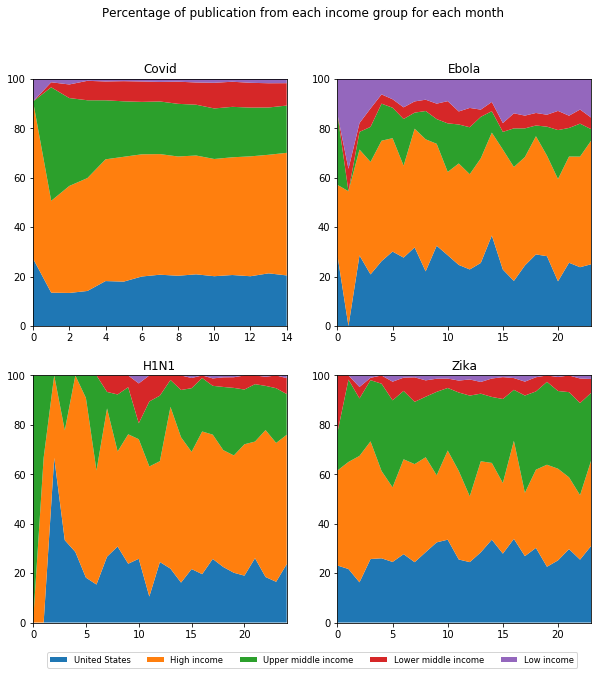

In [25]:
fig, axs = plt.subplots(2, 2,figsize=(10,10))

plt.suptitle('Percentage of publication from each income group for each month')

axs[0, 0].stackplot(df_Pr['Covid_Pr_Income']['Months'], df_Pr['Covid_Pr_Income'].drop(columns=['Months']).to_numpy().transpose(),labels=df_Pr['Covid_Pr_Income'].columns)
axs[0, 0].set_title('Covid')
axs[0, 0].margins(0,0)

axs[0, 1].stackplot(df_Pr['Ebola_Pr_Income']['Months'], df_Pr['Ebola_Pr_Income'].drop(columns=['Months']).to_numpy().transpose(),labels=df_Pr['Ebola_Pr_Income'].columns)
axs[0, 1].set_title('Ebola')
axs[0, 1].margins(0,0)

axs[1, 0].stackplot(df_Pr['H1N1_Pr_Income']['Months'], df_Pr['H1N1_Pr_Income'].drop(columns=['Months']).to_numpy().transpose(),labels=df_Pr['H1N1_Pr_Income'].columns)
axs[1, 0].set_title('H1N1')
axs[1, 0].margins(0,0)

axs[1, 1].stackplot(df_Pr['Zika_Pr_Income']['Months'], df_Pr['Zika_Pr_Income'].drop(columns=['Months']).to_numpy().transpose(),labels=df_Pr['Zika_Pr_Income'].columns)
axs[1, 1].set_title('Zika')
axs[1, 1].margins(0,0)

plt.legend(labels=df_Pr['H1N1_Pr_Income'].columns,ncol=len(df_Pr['H1N1_Pr_Income'].columns), loc='lower center', bbox_to_anchor=(-0.1, -0.2), fontsize='small')

plt.show()

fig.savefig('Income_group.png')

plt.close(fig)